In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
from prophet import Prophet

In [ ]:
df=pd.read_csv('TSLA.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
px.area(df,x='Date',y='Close')

In [ ]:
px.area(df,'Date','Volume')

In [ ]:
training_data=df[['Date','Close']]

In [ ]:
training_data.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [ ]:
cols={'Date':'ds','Close':'y'}

In [ ]:
training_data=training_data.rename(columns=cols)

In [ ]:
model=Prophet()

In [ ]:
model.fit(training_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgwp827_/x8jok90t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgwp827_/yhns42xg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46118', 'data', 'file=/tmp/tmpbgwp827_/x8jok90t.json', 'init=/tmp/tmpbgwp827_/yhns42xg.json', 'output', 'file=/tmp/tmpbgwp827_/prophet_modelfb385s_y/prophet_model-20230507132405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=30)

In [ ]:
forecast=model.predict(future)

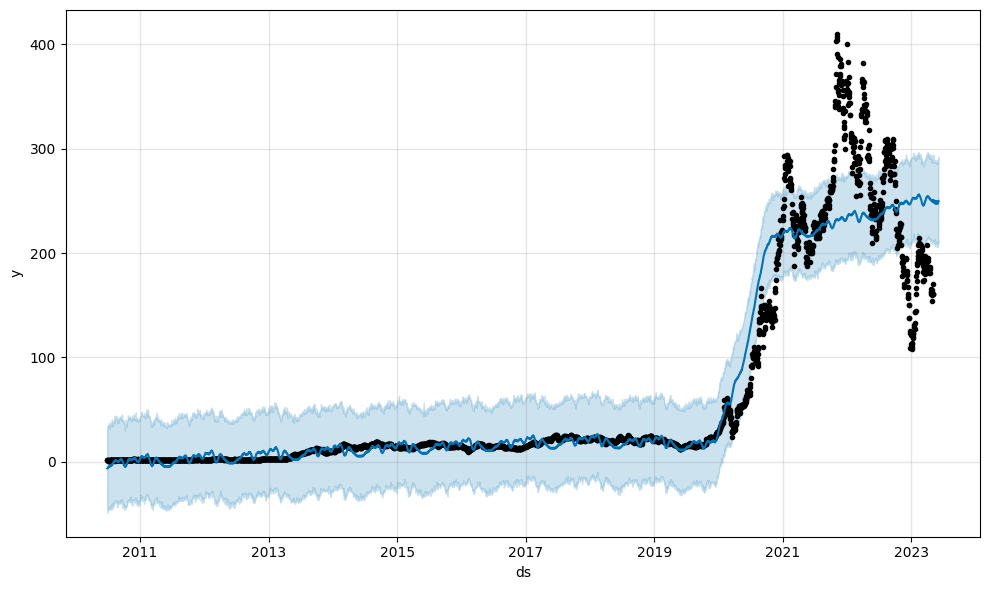

In [ ]:
figure=model.plot(forecast,xlabel='ds',ylabel='y')

In [ ]:
forecast.to_csv('forecast.csv')